# Задача классификации грибов на съедобные и несъедобные 

## Обзор данных

### 0. Словесное описание задачи

Данный датасет включает описания 8124 гипотетических образцов, соответствующих 23 видам грибов, взятые из "Полевого справочника по грибам Северной Америки" (The Audubon Society Field Guide to North American Mushrooms, 1981). Задача заключается в разделении грибов на два класса - съедобные и несъедобные - на основании 22 характеристик (категориальных признаков), представленных ниже:


- **cap-shape** (форма шляпки): bell=b (колоколчатая), conical=c (коническая), convex=x (выпуклая), flat=f (плоская), knobbed=k (бугристая), sunken=s (впалая)


- **cap-surface** (поверхность шляпки): fibrous=f (волокнистая), grooves=g (с выемками), scaly=y (чешуйчатая), smooth=s (гладкая) 


- **cap-color** (цвет шляпки): brown=n (коричневый), buff=b (желтовато-коричневый), cinnamon=c (светло-коричневый), gray=g (серый), green=r (зеленый), pink=p (розовый), purple=u (фиолетовый), red=e (красный), white=w (белый), yellow=y (желтый) 


- **bruises** (синяки): bruises=t (есть), no=f (нет) 


- **odor** (запах): almond=a (миндальный), anise=l (анисовый), creosote=c (креозотовый), fishy=y (рыбный), foul=f (неприятный, противный), musty=m (затхлый), none=n (никакой), pungent=p (резкий, едкий), spicy=s (острый, пряный) 


- **gill-attachment** (форма ламеллы): attached=a (прикрепленная), descending=d (нисходящая), free=f (свободная), notched=n (зубчатая) 


- **gill-spacing** (расположение ламеллы): close=c (близкое), crowded=w (плотное, тесное), distant=d (далекое) 


- **gill-size** (размер ламеллы): broad=b (широкий), narrow=n (узкий) 


- **gill-color** (цвет ламмелы): black=k (черный), brown=n (коричневый), buff=b (желтовато-коричневый), chocolate=h (шоколадный), gray=g (серый), green=r (зеленый), orange=o (оранжевый), pink=p (розовый), purple=u (фиолетовый), red=e (красный), white=w (белый), yellow=y (желтый) 


- **stalk-shape** (форма стебля): enlarging=e (расширяющаяся), tapering=t (сужающаяся) 


- **stalk-root** (корень стебля): bulbous=b (луковичный), club=c (клубчатый), cup=u (чашевидный), equal=e (равный), rhizomorphs=z (ризоморфный), rooted=r (укореняющийся), missing=? (отсутствует) 


- **stalk-surface-above-ring** (поверхность стебля выше кольца): fibrous=f (волокнистая), scaly=y (чешуйчатая), silky=k (шелковистая), smooth=s (гладкая) 


- **stalk-surface-below-ring** (поверхность стебля ниже кольца): fibrous=f (волокнистая), scaly=y (чешуйчатая), silky=k (шелковистая), smooth=s (гладкая) 


- **stalk-color-above-ring** (цвет стебля выше кольца): brown=n (коричневый), buff=b (желтовато-коричневый), cinnamon=c (светло-коричневый), gray=g (серый), orange=o (оранжевый), pink=p (розовый), red=e (красный), white=w (белый), yellow=y (желтый) 


- **stalk-color-below-ring** (цвет стебля ниже кольца): brown=n (коричневый), buff=b (желтовато-коричневый), cinnamon=c (светло-коричневый), gray=g (серый), orange=o (оранжевый), pink=p (розовый), red=e (красный), white=w (белый), yellow=y (желтый)


- **veil-type** (тип вуали): partial=p (частичная), universal=u (полная) 


- **veil-color** (цвет вуали): brown=n (коричневая), orange=o (оранжевая), white=w (белая), yellow=y (желтая) 


- **ring-number** (количество колец): none=n (ни одного), one=o (одно), two=t (два) 


- **ring-type** (тип кольца): cobwebby=c (паутинистое), evanescent=e (еле заметное), flaring=f (расширяющееся книзу), large=l (большое), none=n (никакое), pendant=p (кулонообразное), sheathing=s (обволакивающее), zone=z (зональное) 


- **spore-print-color** (цвет спор): black=k (черный), brown=n (коричневый), buff=b (желтовато-коричневый), chocolate=h (шоколадный), green=r (зеленый), orange=o (оранжевый), purple=u (фиолетовый), white=w (белый), yellow=y (желтый)


- **population** (тип популяции): abundant=a (обильная), clustered=c (скоплениями), numerous=n (многочисленная), scattered=s (рассеянная), several=v (несколько), solitary=y (одиночная)


- **habitat** (среда обитания): grasses=g (трава), leaves=l (листья), meadows=m (луга), paths=p (дороги, тропинки), urban=u (город), waste=w (отходы), woods=d (леса)


### 1. Чтение данных

In [ ]:
! pip install numpy matplotlib pandas plotly seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
# импорт библиотек

import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline

In [48]:
mushroom_dataset = fetch_openml(name='mushroom', version=1, parser='auto')

In [4]:
# Посмотрим на размеры таблицы - количество строк (каждая строка соответствует одному грибу) и количество столбцов (каждый столбец соответствует конкретному признаку)
mushroom_dataset.data.shape

(8124, 22)

In [49]:
# Выведем содержимое датасета 
mushroom_dataset = mushroom_dataset.frame
mushroom_dataset

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,p


In [6]:
# Выведем первые 15 строк датасета
mushroom_dataset.head(15)

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
5,x,y,y,t,a,f,c,b,n,e,...,w,w,p,w,o,p,k,n,g,e
6,b,s,w,t,a,f,c,b,g,e,...,w,w,p,w,o,p,k,n,m,e
7,b,y,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,s,m,e
8,x,y,w,t,p,f,c,n,p,e,...,w,w,p,w,o,p,k,v,g,p
9,b,s,y,t,a,f,c,b,g,e,...,w,w,p,w,o,p,k,s,m,e


In [7]:
# Выведем последние 15 строк датасета
mushroom_dataset.tail(15)

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
8109,b,s,w,f,n,f,w,b,w,e,...,w,w,p,w,t,p,w,n,g,e
8110,x,s,n,f,n,a,c,b,o,e,...,o,o,p,o,o,p,n,v,l,e
8111,k,s,w,f,n,f,w,b,p,e,...,w,w,p,w,t,p,w,n,g,e
8112,k,s,n,f,n,a,c,b,o,e,...,o,o,p,n,o,p,b,v,l,e
8113,k,y,e,f,y,f,c,n,b,t,...,p,p,p,w,o,e,w,v,d,p
8114,f,y,c,f,m,a,c,b,y,e,...,c,c,p,w,n,n,w,c,d,p
8115,x,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,o,v,l,e
8116,k,y,n,f,s,f,c,n,b,t,...,p,w,p,w,o,e,w,v,l,p
8117,k,s,e,f,y,f,c,n,b,t,...,p,w,p,w,o,e,w,v,d,p
8118,k,y,n,f,f,f,c,n,b,t,...,p,w,p,w,o,e,w,v,d,p


In [8]:
# Выведем имена столбцов (признаков)
mushroom_dataset.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises%3F', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'class'],
      dtype='object')

In [9]:
# Выведем информацию по датасету
mushroom_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   cap-shape                 8124 non-null   category
 1   cap-surface               8124 non-null   category
 2   cap-color                 8124 non-null   category
 3   bruises%3F                8124 non-null   category
 4   odor                      8124 non-null   category
 5   gill-attachment           8124 non-null   category
 6   gill-spacing              8124 non-null   category
 7   gill-size                 8124 non-null   category
 8   gill-color                8124 non-null   category
 9   stalk-shape               8124 non-null   category
 10  stalk-root                5644 non-null   category
 11  stalk-surface-above-ring  8124 non-null   category
 12  stalk-surface-below-ring  8124 non-null   category
 13  stalk-color-above-ring    8124 non-null   catego

### 2. Визуализация данных

Построим гистограмму, показывающую количество съедобных и несъедобных грибов по признаку формы шляпки

<Axes: xlabel='cap-shape', ylabel='count'>

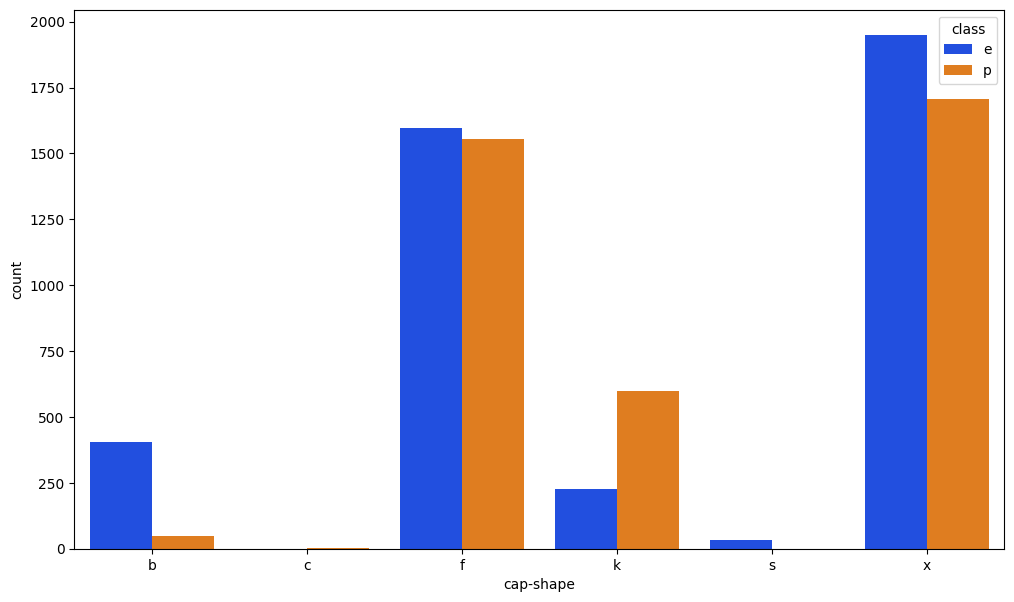

In [10]:
plt.figure(figsize=(12,7))
sns.countplot(data=mushroom_dataset, x='cap-shape', hue='class', palette='bright')

e - edible (съедобные), p - poisonous (ядовитые)

Классы грибов деляться на съедобные (обозначены синим цветом) и несъедобные (обозначены оранжевым цветом). В признаке "cap-shape" (форма шляпки) буквы обозначают следующее: bell=b (колоколчатая), conical=c (коническая), convex=x (выпуклая), flat=f (плоская), knobbed=k (бугристая), sunken=s (впалая)

Грибы, имеющие бугристую шляпку в большинстве своем несъедобные, а колокольчатую форму имеют в основном съедобные грибы. Плоская форма шляпки с практически одинаковой частотой встречается как у съедобных, так и у несъедобных грибов. Впалая форма встречается очень редко, и грибы с такой шляпкой относятся к съедобным. Также очень редко встречается коническая форма шляпки. Все грибы с такой формой относят к несъедобным

Теперь построим гистограмму для цвета шляпки

<Axes: xlabel='cap-color', ylabel='count'>

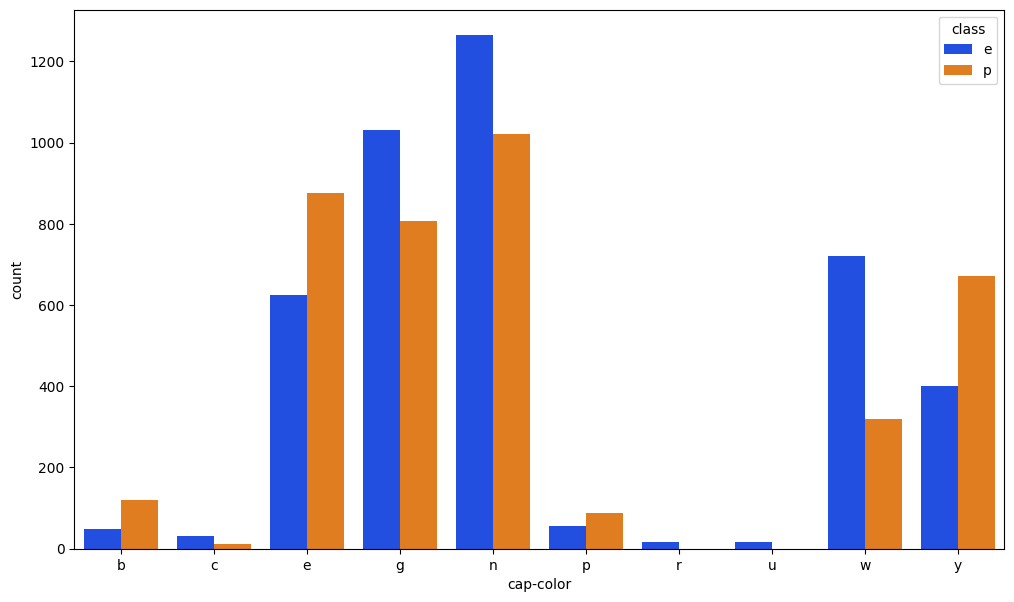

In [11]:
plt.figure(figsize=(12,7))
sns.countplot(data=mushroom_dataset, x='cap-color', hue='class', palette='bright')

В признаке "cap-color" (цвет шляпки) буквы обозначают следующее: brown=n (коричневый), buff=b (желтовато-коричневый), cinnamon=c (светло-коричневый), gray=g (серый), green=r (зеленый), pink=p (розовый), purple=u (фиолетовый), red=e (красный), white=w (белый), yellow=y (желтый)

Проанализировав гистограмму, можно заметить, что преобладающим цветом является коричневый и большинство грибов с таким цветом шляпки является съедобным. Можно также отметить, что полностью съедобными являются только грибы с зеленым или фиолетовым цветом шляпки.

Теперь построим гистограмму, показывающую количество съедобных и несъедобных грибов по их запаху

<Axes: xlabel='odor', ylabel='count'>

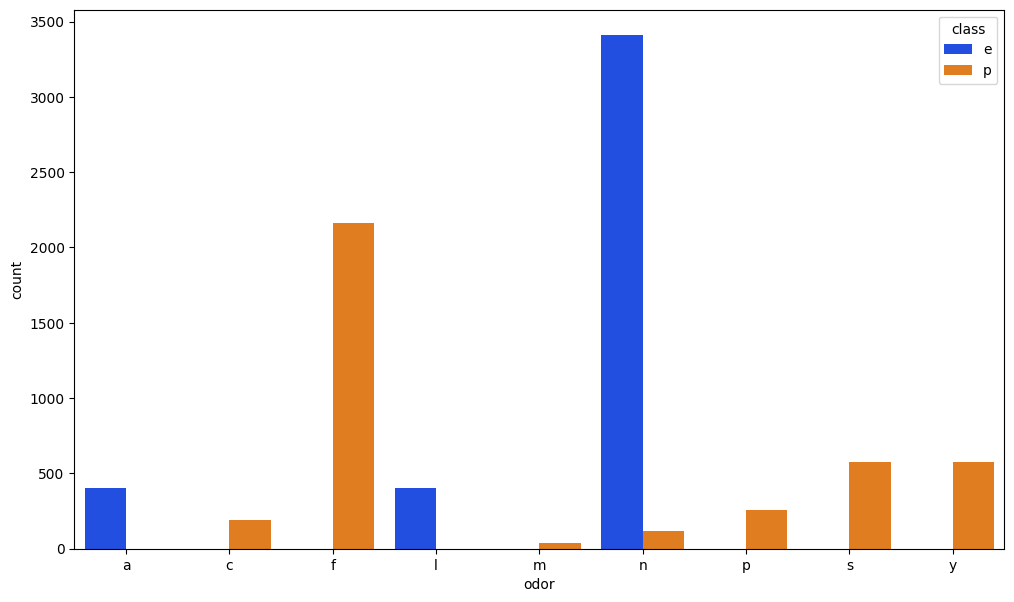

In [12]:
plt.figure(figsize=(12,7))
sns.countplot(data=mushroom_dataset, x='odor', hue='class', palette='bright')

В признаке "odor" (запах) буквы обозначают следующее: almond=a (миндальный), anise=l (анисовый), creosote=c (креозотовый), fishy=y (рыбный), foul=f (очень неприятный, противный), musty=m (затхлый), none=n (никакой), pungent=p (резкий, едкий), spicy=s (острый, пряный)

Как мы можем заметить, грибы с креозотовым, очень неприятным, затхлым, резким, пряным или рыбным запахов всегда относятся к несъедобным, в то время как грибы с миндальным или анисовым запахом всегда относятся к съедобным. Что касается грибов без запаха, то большая их часть является съедобной, но встречаются также и несъедобные грибы, которые не имеют запаха

Теперь посмотрим, как грибы распределены по признаку "среда обитания"

<Axes: xlabel='habitat', ylabel='count'>

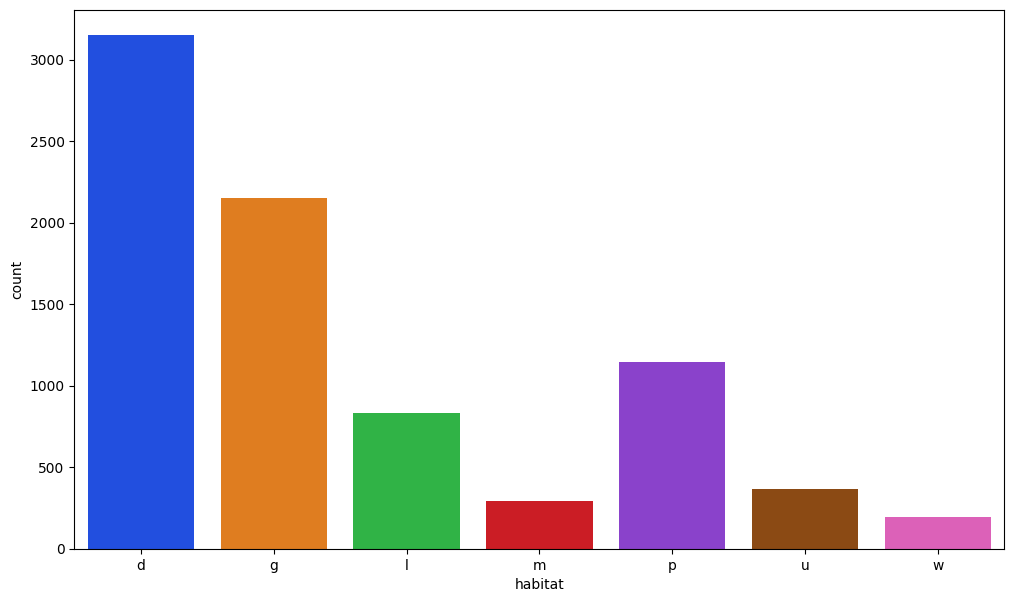

In [53]:
plt.figure(figsize=(12,7))
sns.countplot(data=mushroom_dataset, x='habitat', hue="habitat", palette='bright')

В признаке "habitat" (среда обитания) буквы обозначают следующее: grasses=g (трава), leaves=l (листья), meadows=m (луга), paths=p (дороги, тропинки), urban=u (город), waste=w (отходы), woods=d (леса)

Как мы видим, чаще всего грибы можно встретить в лесу, а реже всего - в отходах

Построим, как грибы распределены по типу корня стебля

<Axes: xlabel='stalk-root', ylabel='count'>

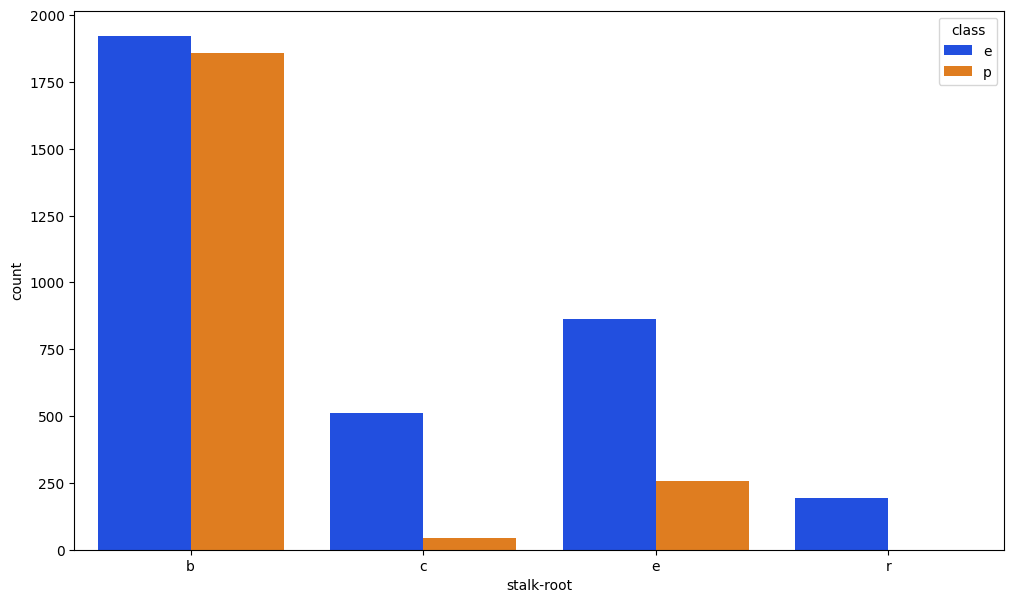

In [15]:
plt.figure(figsize=(12,7))
sns.countplot(data=mushroom_dataset, x='stalk-root', hue='class', palette='bright')

В признаке "stalk-root" (корень стебля) буквы обозначают следующее: bulbous=b (луковичный), club=c (клубчатый), cup=u (чашевидный), equal=e (равный), rhizomorphs=z (ризоморфный), rooted=r (укореняющийся)

Как мы можем заметить, в этом признаке имеются пропущенные значения (чашевидные и ризоморфные грибы отсутствуют)

Теперь мы можем посмотреть распределение данных по двум классам - съедобные и несъедобные грибы

<Axes: xlabel='class', ylabel='count'>

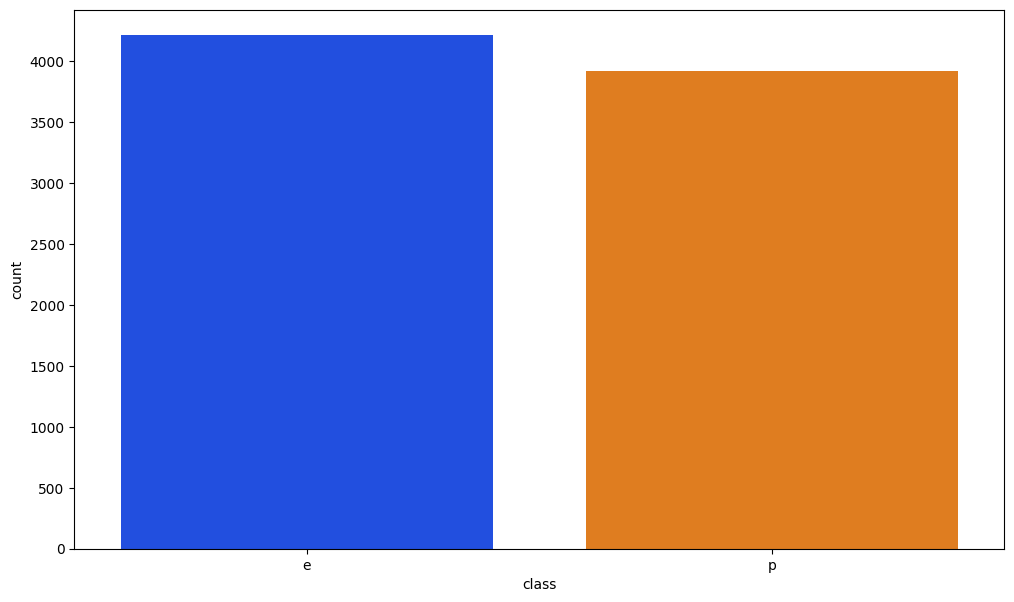

In [55]:
plt.figure(figsize=(12,7))
sns.countplot(data=mushroom_dataset, x='class', hue='class', palette='bright')

Синим цветом обозначены съедобные грибы, оранжевым - несъедобные. Съедобных грибов в датасете немного больше, чем несъедобных

Далее выведем описательную статистику по датасету (все признаки данного датасета являются категориальными)

In [17]:
mushroom_dataset.describe()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


Проанализировав полученную таблицу, можно заметить, что в столбце "veil-type" (тип вуали) присутствует только одно уникальное значение, следовательно, стоит удалить этот столбец, поскольку он не слишком информативен для решения поствленной задачи классификации

### 3. Обработка пропущенных значений

In [18]:
mushroom_dataset.isnull().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises%3F                     0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
class                          0
dtype: int64

Как мы можем заметить, значения пропущены только в одном из столбцов, поэтому мы можем просто удалить его, чтобы избавиться от лишнего шума в данных. Удалим также столбец "veil-type" (тип вуали), поскольку, как было выяснено ранее, в нем присутствует всего одно уникальное значение

In [19]:
mushroom_dataset = mushroom_dataset.drop(columns=['stalk-root'], axis=1)
mushroom_dataset = mushroom_dataset.drop(columns=['veil-type'], axis=1)

In [20]:
mushroom_dataset.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises%3F                  0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
class                       0
dtype: int64

Пропущенных значений больше нет

### 4. Обработка категориальных признаков

В данном датасете все признаки категориальные. Мы можем преобразовать их с помощью LabelEncoder (просто заменяем все строки на числа, нумеруя их)

In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
mushroom_dataset_new = mushroom_dataset.copy()
for col in mushroom_dataset_new.columns:
    mushroom_dataset_new[col] = label_encoder.fit_transform(mushroom_dataset_new[col])
mushroom_dataset_new.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,2,1,0,3,0,1,0


Теперь, поскольку все признаки стали числовыми, мы можем построить корреляционную матрицу

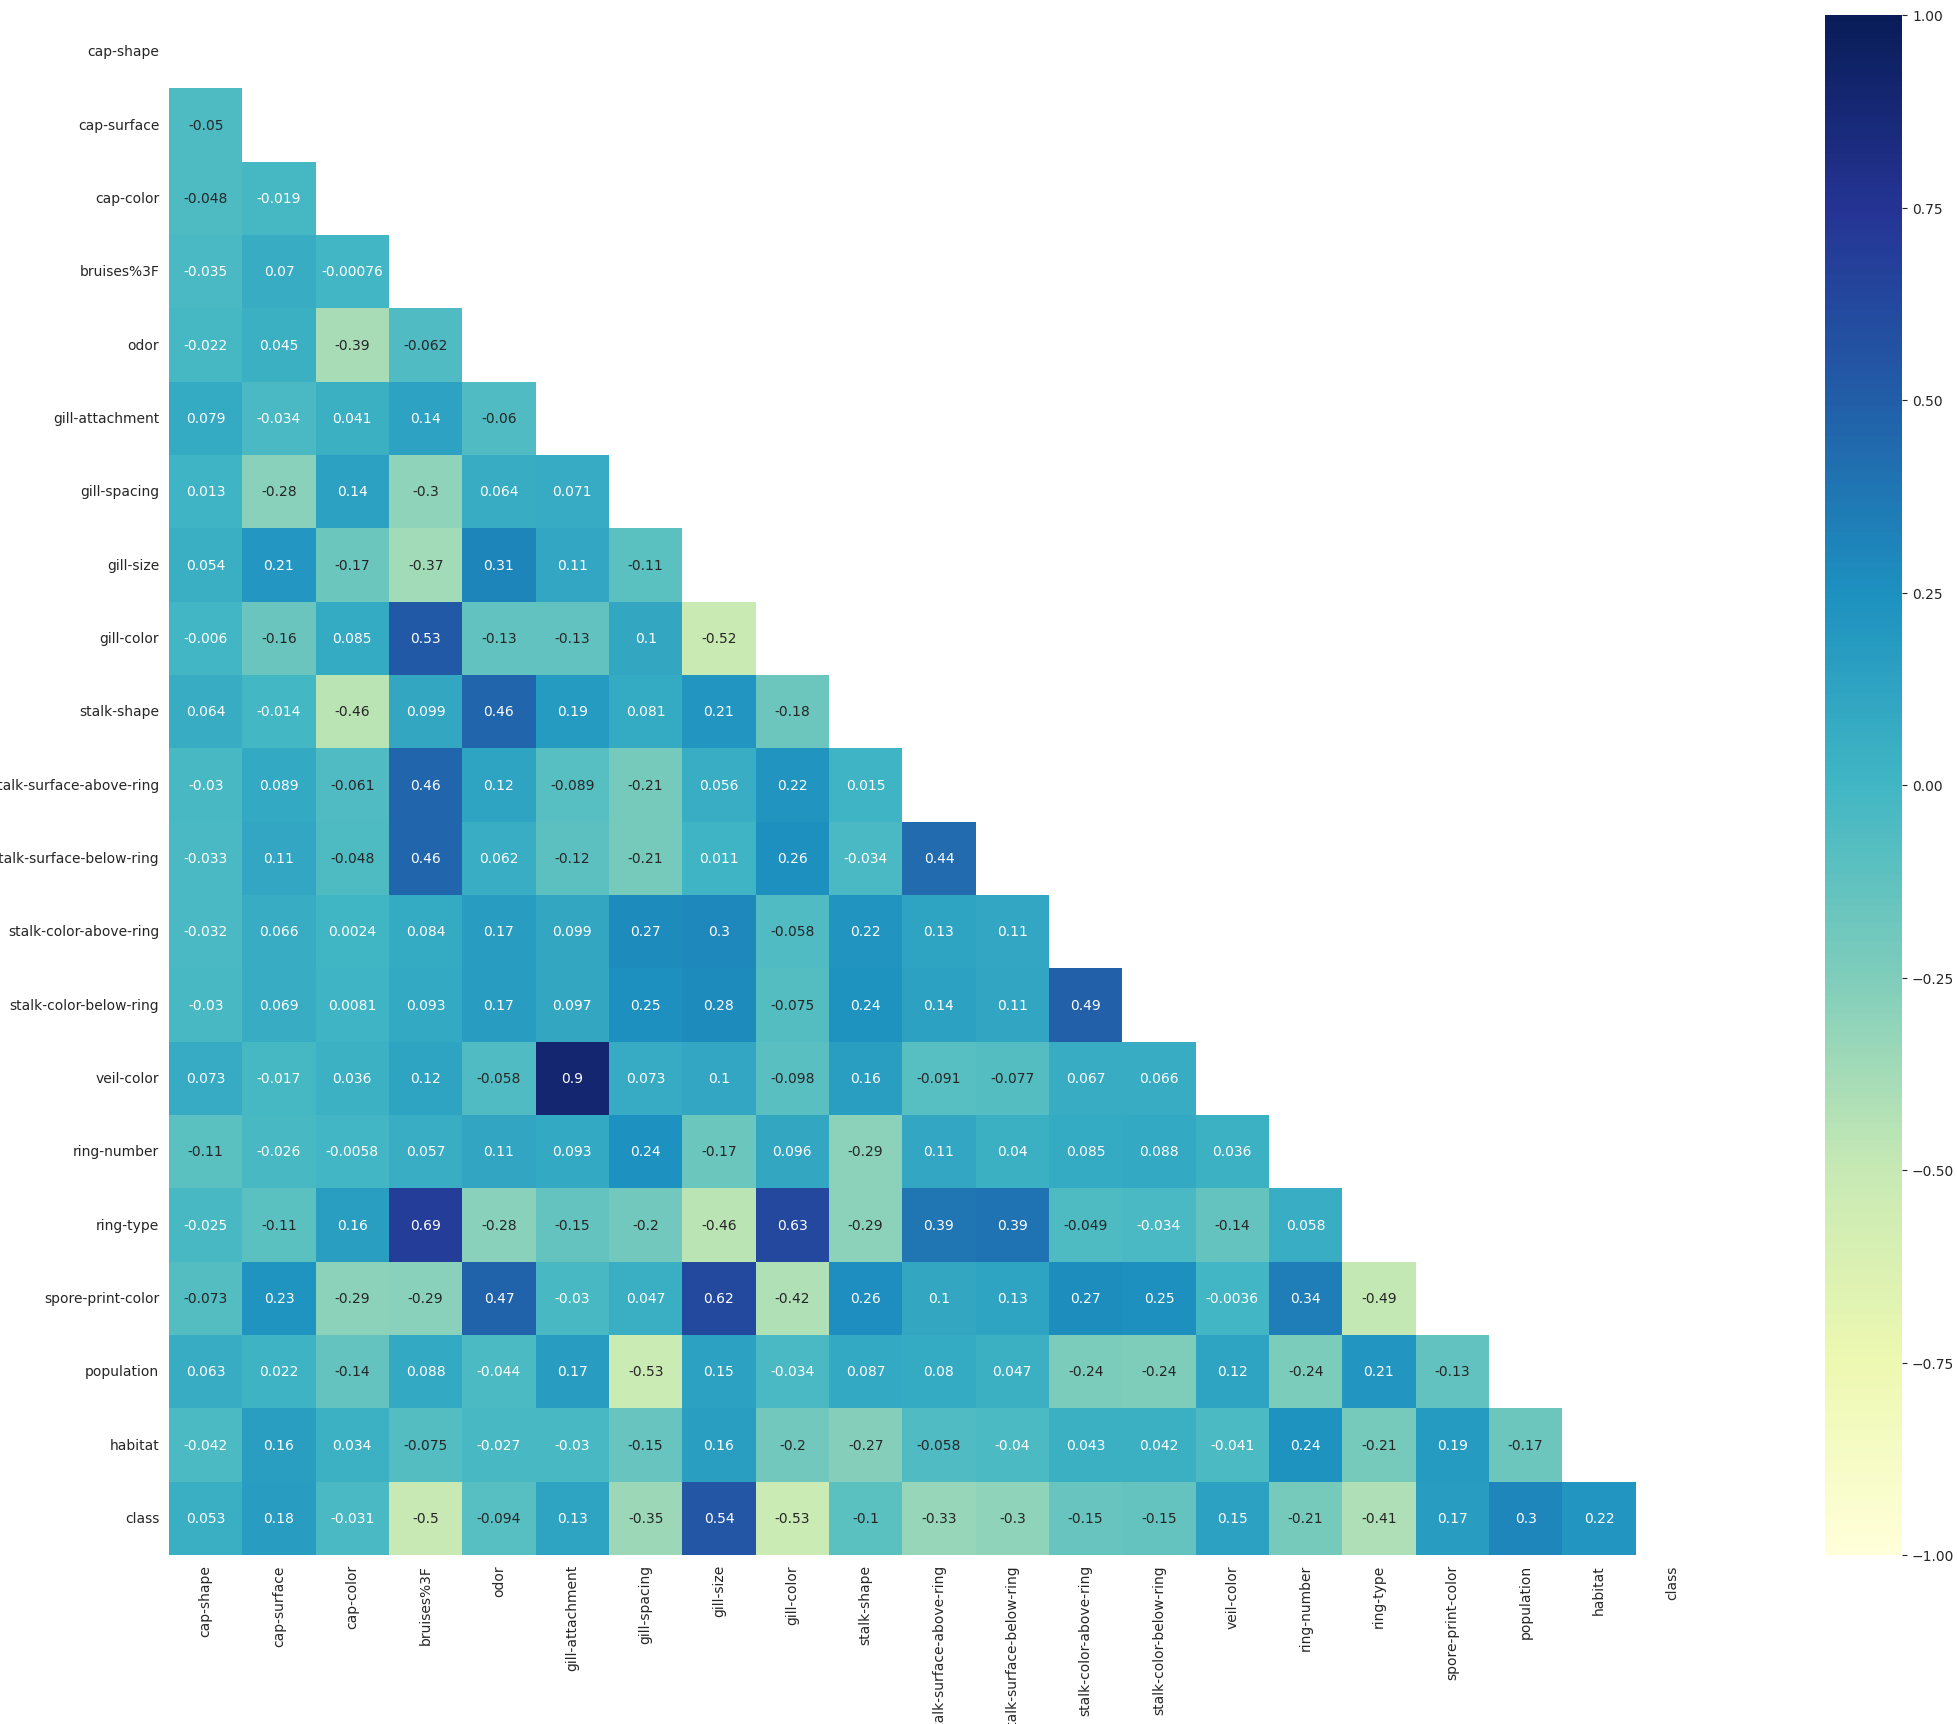

In [22]:
corr_matrix = mushroom_dataset_new.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(30,20))
    sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap="YlGnBu", annot=True, mask=mask, square=True)

Мы можем заметить, что в целом корреляция между признаками довольно слабая, однако есть признаки, между которыми относительно сильная корреляция. Самая сильная корреляция наблюдается между признаками "veil-color" (цвет вуали) и "gill-attachment" (форма ламеллы)

### 5. Нормализация

Поскольку все признаки изначально являются категориальными, в нашем случае нормализация не требуется

### 6. Разбиение данных на обучающую и тестовую выборки

Чтобы разбить данные на обучающие и тестовые, воспользуемся функцией из библиотеки sklearn. Пусть обучающая выборка составляет 80%, а тестовая - 20%

In [23]:
from sklearn.model_selection import train_test_split
X = mushroom_dataset_new.drop('class', axis = 1)
y = mushroom_dataset_new['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Машинное обучение (kNN)

### 7. KNeighbors

Воспользуемся классификатором ближайших соседей. Попробуем разное число k (количество соседей) и сравним полученные результаты

In [24]:
from sklearn.neighbors import KNeighborsClassifier

accuracy_list_train = []
accuracy_list_test = []
for i in range(1, 31):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train, y_train)
    
    accuracy_train = round(KNN.score(X_train, y_train)*100, 4)
    accuracy_list_train.append(accuracy_train)
    
    accuracy_test = round(KNN.score(X_test, y_test)*100, 4)
    accuracy_list_test.append(accuracy_test)

Построим график Accuracy на обучающей выборке

Text(0, 0.5, 'Accuracy on train, %')

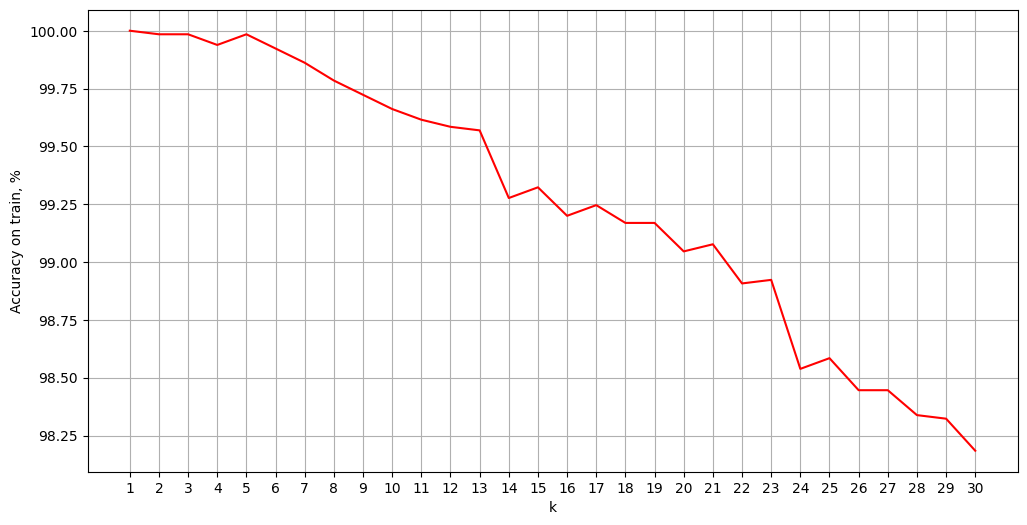

In [25]:
k = np.arange(1, 31)
plt.figure(figsize=(12, 6))
plt.plot(k, accuracy_list_train, 'red')
plt.xlabel('k')
plt.xticks(np.arange(min(k), max(k)+1, 1.0))
plt.grid(which='major')
plt.ylabel('Accuracy on train, %')

Как мы можем заметить, лучший результат достигается при k = 1

Теперь построим график Accuracy на тестовой выборке

Text(0, 0.5, 'Accuracy on test, %')

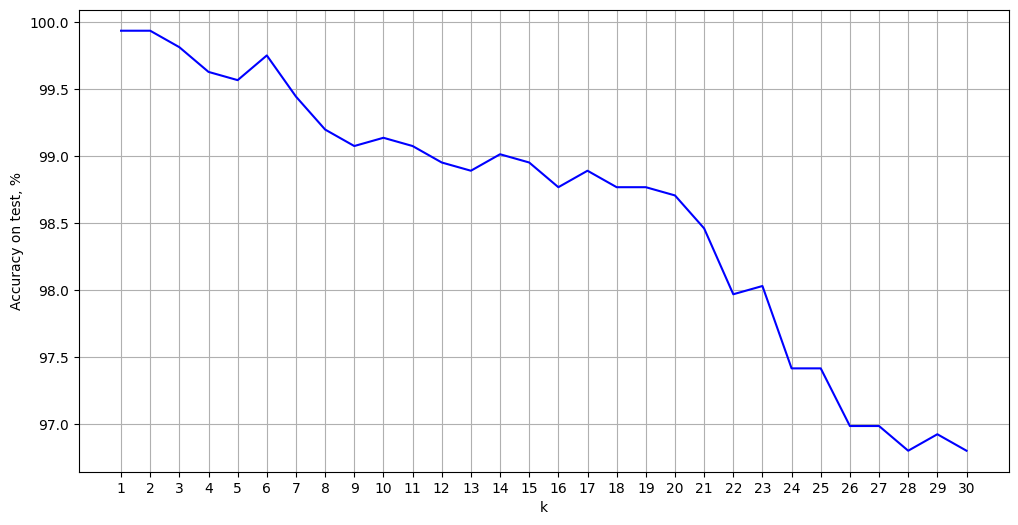

In [26]:
k = np.arange(1, 31)
plt.figure(figsize=(12, 6))
plt.plot(k, accuracy_list_test, 'blue')
plt.xlabel('k')
plt.xticks(np.arange(min(k), max(k)+1, 1.0))
plt.grid(which='major')
plt.ylabel('Accuracy on test, %')

Как мы можем заметить, лучше всего алгоритм работает при k = 1 и при k = 2

Применим алгоритм ближайщих соседей при k = 1 и посмотрим, чему равно значение ошибки

In [27]:
KNN_model = KNeighborsClassifier(n_neighbors = 1).fit(X_train, y_train)

start_time = time.time()
error_train = 1 - KNN_model.score(X_train, y_train)
error_test = 1 - KNN_model.score(X_test, y_test)
end_time = time.time()
runtime = end_time - start_time

print('Error on train = ', error_train)
print('Error on test = ', error_test)
print('Runtime = ', runtime)

Error on train =  0.0
Error on test =  0.0006153846153845732
Runtime =  0.9063942432403564


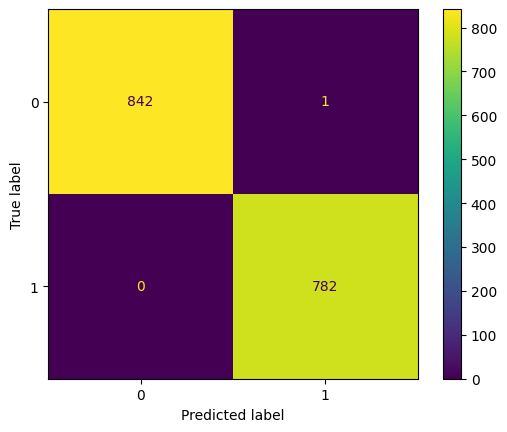

In [28]:
ConfusionMatrixDisplay.from_estimator(KNN_model, X_test, y_test)

Как мы можем заметить, на обучающей выборке ошибки отсутствуют, а на тестовой их количество минимально

## Машинное обучение (другие классификаторы)

### 8. Random Forest

In [29]:
from sklearn import ensemble
RF = ensemble.RandomForestClassifier(n_estimators = 100)

In [30]:
%%time
RF.fit(X_train, y_train)

CPU times: total: 156 ms
Wall time: 259 ms


RandomForestClassifier()

In [31]:
start_time = time.time()
error_train = np.mean(y_train != RF.predict(X_train))
error_test  = np.mean(y_test  != RF.predict(X_test))
end_time = time.time()
runtime = end_time - start_time

print('Error on train = ', error_train)
print('Error on test = ', error_test)
print('Runtime = ', runtime)

Error on train =  0.0
Error on test =  0.0
Runtime =  0.09398794174194336


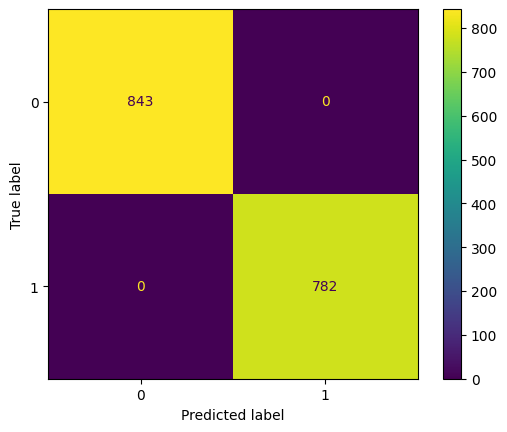

In [32]:
ConfusionMatrixDisplay.from_estimator(RF, X_test, y_test)

### 9. Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver="lbfgs", max_iter=500)

In [34]:
%%time
LR.fit(X_train, y_train)

CPU times: total: 15.6 ms
Wall time: 342 ms


LogisticRegression(max_iter=500)

In [35]:
start_time = time.time()
error_train = np.mean(y_train != LR.predict(X_train))
error_test  = np.mean(y_test  != LR.predict(X_test))
end_time = time.time()
runtime = end_time - start_time

print('Error on train = ', error_train)
print('Error on test = ', error_test)
print('Runtime = ', runtime)

Error on train =  0.05123865210032313
Error on test =  0.055384615384615386
Runtime =  0.008002758026123047


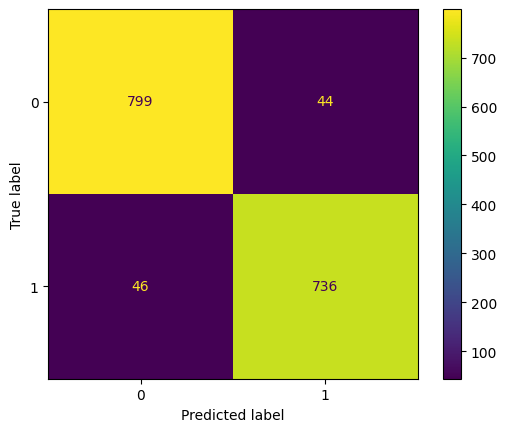

In [36]:
ConfusionMatrixDisplay.from_estimator(LR, X_test, y_test) 

### 10. Полносвязная нейронная сеть c 1-м скрытым слоем


In [37]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes = (100,),
                          solver = 'lbfgs', 
                          activation = 'logistic',
                          random_state = 42)

In [38]:
%%time
MLP.fit(X_train, y_train)

CPU times: total: 1.3 s
Wall time: 3.76 s


MLPClassifier(activation='logistic', random_state=42, solver='lbfgs')

In [39]:
start_time = time.time()
error_train = np.mean(y_train != MLP.predict(X_train))
error_test  = np.mean(y_test  != MLP.predict(X_test))
end_time = time.time()
runtime = end_time - start_time

print('Error on train = ', error_train)
print('Error on test = ', error_test)
print('Runtime = ', runtime)

Error on train =  0.0
Error on test =  0.0006153846153846154
Runtime =  0.06901383399963379


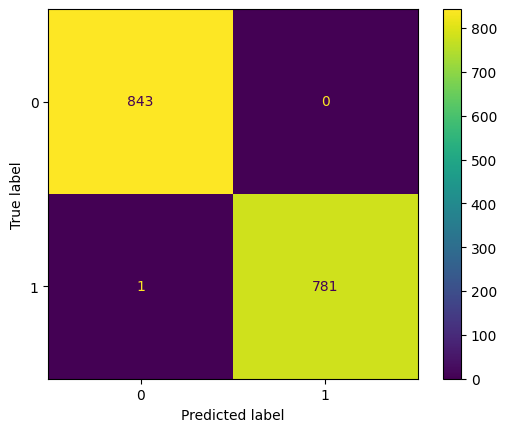

In [40]:
ConfusionMatrixDisplay.from_estimator(MLP, X_test, y_test) 

#### Подбор гиперпараметров

Для начала подберем оптимальное значение параметра регуляризации alpha

C:\Users\Nick\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


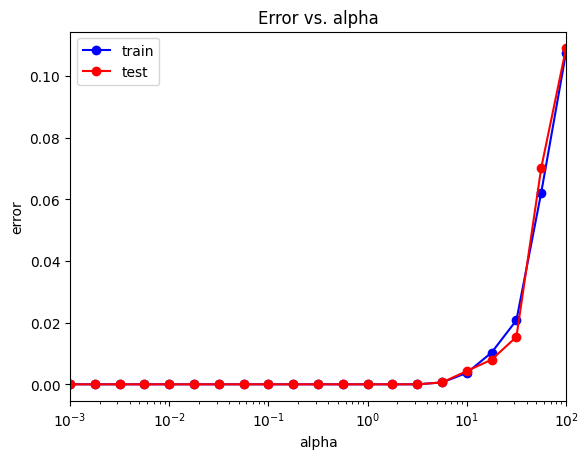

In [41]:
alpha_arr = np.logspace(-3, 2, 21)

train_err = []
test_err = []

for alpha in alpha_arr:
    MLP = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
    MLP.fit(X_train, y_train)

    y_train_pred = MLP.predict(X_train)
    y_test_pred = MLP.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

Получилии график зависимости ошибки от параметра alpha

Минимальное значение ошибки:

In [42]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print('Min error on train = ', min_train_err)
print('Min error on test = ', min_test_err)

Min error on train =  0.0
Min error on test =  0.0


Оптимальные значения alpha:

In [43]:
alpha_opt = alpha_arr[test_err == min_test_err]
print('Optimal alpha = ', alpha_opt)

Optimal alpha =  [1.00000000e-03 1.77827941e-03 3.16227766e-03 5.62341325e-03
 1.00000000e-02 1.77827941e-02 3.16227766e-02 5.62341325e-02
 1.00000000e-01 1.77827941e-01 3.16227766e-01 5.62341325e-01
 1.00000000e+00 1.77827941e+00 3.16227766e+00]


Теперь подберем оптимальное количество нейронов

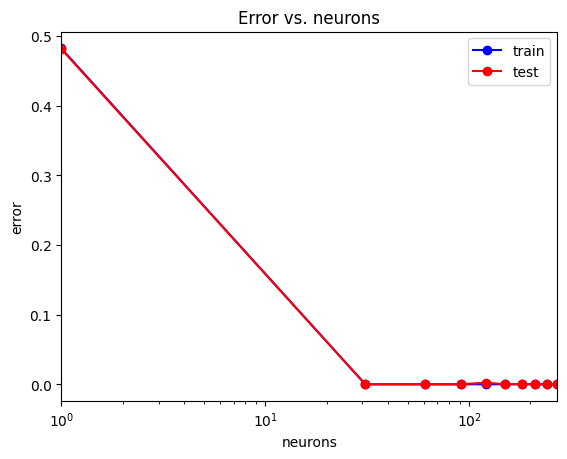

In [44]:
neurons_num = np.array([i for i in range(1, 300, 30)])

train_err = []
test_err = []

for neurons in neurons_num:
    MLP = MLPClassifier(alpha = alpha_opt[0], hidden_layer_sizes = (neurons,), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
    MLP.fit(X_train, y_train)

    y_train_pred = MLP.predict(X_train)
    y_test_pred = MLP.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

plt.semilogx(neurons_num, train_err, 'b-o', label = 'train')
plt.semilogx(neurons_num, test_err, 'r-o', label = 'test')
plt.xlim([np.min(neurons_num), np.max(neurons_num)])
plt.title('Error vs. neurons')
plt.xlabel('neurons')
plt.ylabel('error')
plt.legend()

Минимальное значение ошибки:

In [45]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print('Min error on train = ', min_train_err)
print('Min error on test = ', min_test_err)

Min error on train =  0.0
Min error on test =  0.0


Оптимальное количество нейронов:

In [46]:
neurons_num_opt = neurons_num[test_err == min_test_err]
print('Optimal number of neurons = ', neurons_num_opt)

Optimal number of neurons =  [ 31  61  91 151 211 241 271]


In [ ]:
MLP = MLPClassifier(alpha = alpha_opt[0], hidden_layer_sizes = (neurons_num_opt[0],), random_state = 42)

In [ ]:
%%time
MLP.fit(X_train, y_train)

CPU times: total: 1min 5s
Wall time: 33.3 s


MLPClassifier(alpha=0.001, hidden_layer_sizes=(241,), random_state=42)

In [ ]:
error_train = np.mean(y_train != MLP.predict(X_train))
error_test  = np.mean(y_test  != MLP.predict(X_test))

print('Error on train =', error_train)
print('Error on test =', error_test)

Error on train = 0.026665257670224384
Error on test = 0.026854037044983195


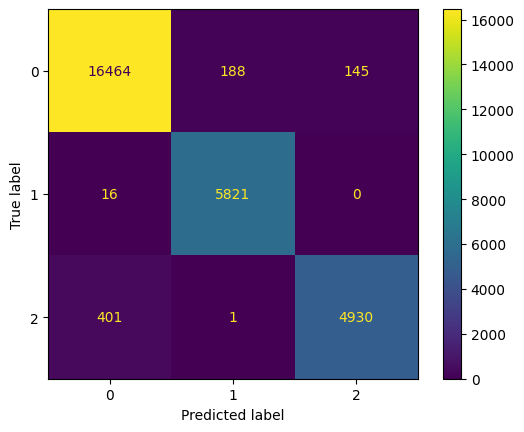

In [ ]:
ConfusionMatrixDisplay.from_estimator(MLP, X_test, y_test)

### 11. Вывод

В рамках данного домашнего задания была рассмотрена задача классификации грибов на основании их физических характеристик на съедобные и несъедобные. Были обучены следующие модели: логистическая регрессия, Random Forest и полносвязная неглубокая нейронная сеть. Для нейронной сети были подобраны оптимальные значения гиперпараметров (alpha и количество нейронов). При оптимальных значениях гиперпараметров удалось достичь 100-процентной точности на тренировочной и тестовой выборках. На мой взгляд, столь высокая точность достигается за счет того, что практически во всех случаях грибы могут быть однозначно классифицированы по едниственному признаку, а именно запаху. Сложности могут возникнуть только с грибами, не имеющими запаха. 

Как мы можем заметить, рассматривая полученные графики, переобучения или недообучения не возникает. 

Логистическая регрессия показала результат хуже (точность не равна 100%), чем Random Forest и нейронная сеть. Также можно заметить, что нейронная сеть обучается медленне, чем Random Forest, при этом обе модели показывают одинаковую точность, поэтому можно сделать вывод, что Random Forest лучше подходит для данной задачи.